In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('FTSE.csv', usecols=['Date', 'Price'])
df.drop(df.index[[759,760]], inplace=True) # drop last 2 rows
df['Price'] = df['Price'].str.replace(",", "").astype('float') # remove comma, convert to float
# df = df.reindex(index=df.index[::-1])
df.iloc[:] = df.iloc[::-1].values
df.head()

,Date,Price
0,"Feb 23, 2015",6912.16
1,"Feb 24, 2015",6949.63
2,"Feb 25, 2015",6935.38
3,"Feb 26, 2015",6949.73
4,"Feb 27, 2015",6946.66


Text(0.5,1,u'FTSE100 for 3 years')

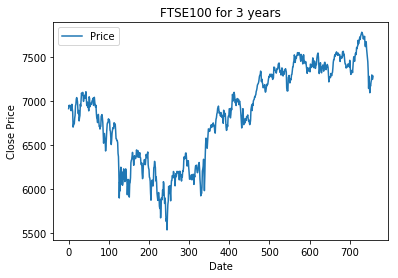

In [37]:
df.plot()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('FTSE100 for 3 years')

In [2]:
import datetime as dt
import bs4 as bs
import pickle
import requests

resp = requests.get('https://en.wikipedia.org/wiki/FTSE_100_Index#FT_30') # get tickers from wikipedia
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class':'wikitable sortable'}) # from wikipedia's table
tickers = []
for row in table.findAll('tr')[1:]: # get all tickers
    ticker = row.findAll('td')[1].text
    if not ticker == "JE.": # JE. ticker not working
        tickers.append(ticker)

with open("ftse100tickers.pickle", "wb") as f: # pickle all ticker
    pickle.dump(tickers, f)

99

In [39]:
import pandas_datareader.data as web
import os

with open("ftse100tickers.pickle", "rb") as f:
    tickers = pickle.load(f)

if not os.path.exists('stock_dfs'): # if directory not exists
    os.makedirs('stock_dfs')

start = dt.datetime(2015, 2, 23)
end = dt.datetime(2018, 2, 15)

for ticker in tickers: # tickers[:10] # get first 10 or any tickers
    if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
        df = web.DataReader(ticker, 'google', start, end)
        df.to_csv('stock_dfs/{}.csv'.format(ticker))
    else:
        print('{} already exists'.format(ticker))

III already exists
ADM already exists
AAL already exists
ANTO already exists
AHT already exists
ABF already exists
AZN already exists
AV. already exists
BA. already exists
BARC already exists
BDEV already exists
BKG already exists
BLT already exists
BP. already exists
BATS already exists
BLND already exists
BT.A already exists
BNZL already exists
BRBY already exists
CCL already exists
CNA already exists
CCH already exists
CPG already exists
CRH already exists
CRDA already exists
DCC already exists
DGE already exists
DLG already exists
EZJ already exists
EVR already exists
EXPN already exists
FERG already exists
FRES already exists
GFS already exists
GKN already exists
GSK already exists
GLEN already exists
HLMA already exists
HMSO already exists
HL. already exists
HSBA already exists
IMB already exists
INF already exists
IHG already exists
IAG already exists
ITRK already exists
ITV already exists
JMAT already exists
KGF already exists
LAND already exists
LGEN already exists
LLOY alread

In [43]:
df1 = pd.read_csv('stock_dfs/VOD.csv', usecols=['Date', 'Close'])
df1.head()

,Date,Close
0,2015-02-23,232.7
1,2015-02-24,226.5
2,2015-02-25,223.7
3,2015-02-26,224.7
4,2015-02-27,224.4


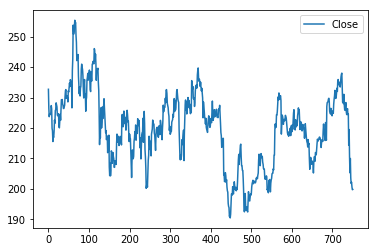

In [44]:
df1.plot()

In [38]:
# compile ftse30
import numpy as np
import pandas as pd
import os, random

N = 30 # number of assets, investment portion
# random select 30 assets
rand_stocks = [] # store selected asset names
while(1):
    rand_stock = random.choice(os.listdir("stock_dfs/"))
    if rand_stock is not '.ipynb_checkpoints' and rand_stock not in rand_stocks: # prevent duplicate
        rand_stocks.append(rand_stock)
        if len(rand_stocks) == 30:
            break
rand_stocks

['BLND.csv',
 'MNDI.csv',
 'MKS.csv',
 'NMC.csv',
 'SLA.csv',
 'RRS.csv',
 'CCH.csv',
 'SVT.csv',
 'III.csv',
 'BARC.csv',
 'SBRY.csv',
 'TSCO.csv',
 'SGE.csv',
 'IAG.csv',
 'OML.csv',
 'RR..csv',
 'GKN.csv',
 'RDSA.csv',
 'BP..csv',
 'DCC.csv',
 'INF.csv',
 'GSK.csv',
 'MDC.csv',
 'ITV.csv',
 'LAND.csv',
 'RB..csv',
 'EZJ.csv',
 'CNA.csv',
 'AAL.csv',
 'UU..csv']

In [39]:
# compile assets into one file
main_df = pd.DataFrame()
for count,ticker in enumerate(rand_stocks): # read asset files
    df = pd.read_csv('stock_dfs/'+ticker, usecols=['Close'])
    df.rename(columns = {'Close': ticker}, inplace=True) # rename 'Close' to ticker name
    df = df.tail(750) # make all data same size from the back
    df.reset_index(drop=True, inplace=True) # reindex from 0
    if main_df.empty: # if big file is empty
        main_df = df
    else:
        main_df = pd.concat([main_df, df], axis=1)
main_df.to_csv('ftse30.csv')